In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score,recall_score
import xgboost as xgb

In [2]:
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [7]:
#List of columns that have only one value
singlevaluedcol=[]
for i in df.columns:
    if df[i].nunique==1:
        singlevaluedcol.append(i)
        

In [8]:
singlevaluedcol

[]

In [9]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

In [10]:
#d

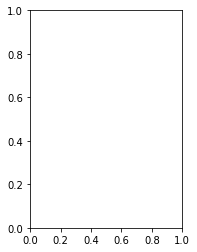

In [11]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)

Text(0.5,1,'Number of Patients males or females who did not suffer heart attacks')

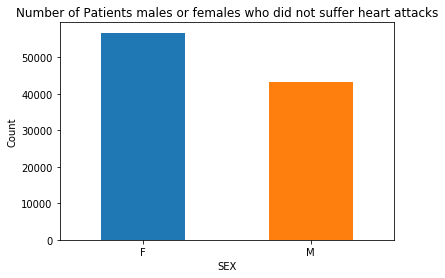

In [12]:
#Plot for Male and female count for heart attack patients
df.groupby('SEX_CD').count()['ID'].plot.bar()
plt.xlabel("SEX")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Number of Patients males or females who did not suffer heart attacks")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

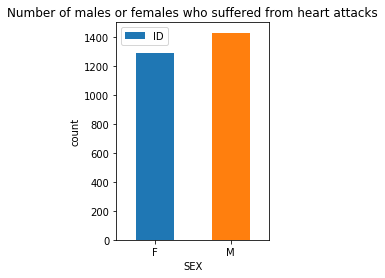

In [13]:
plt.subplot(1,2,2)
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot.bar(legend=True)
plt.xlabel("SEX")
plt.ylabel("count")
plt.title("Number of males or females who suffered from heart attacks")
plt.xticks(rotation=0)
plt.show()

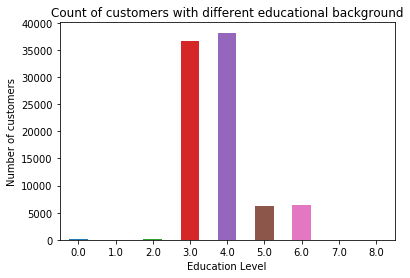

In [15]:
df.groupby('Education_level').count()['ID'].plot.bar()
plt.xlabel("Education Level")
plt.ylabel("Number of customers")
plt.title("Count of customers with different educational background")
plt.xticks(rotation=0)
plt.show()

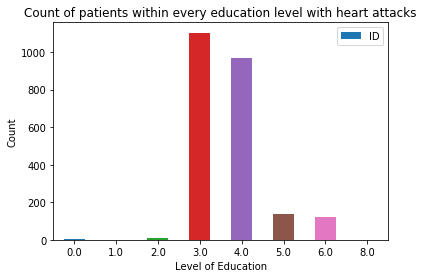

In [16]:
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Level of Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of patients within every education level with heart attacks")
plt.show()

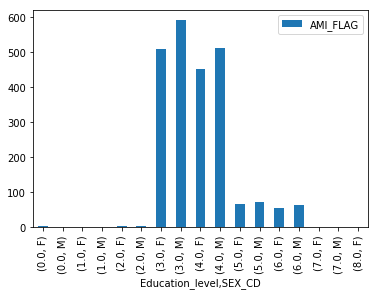

In [17]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



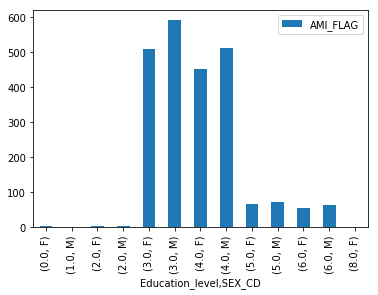

In [18]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


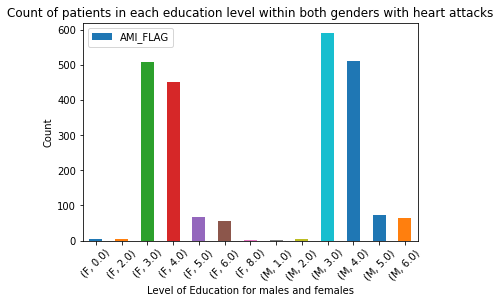

In [19]:
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot.bar(stacked=True,legend=True)
plt.xlabel("Level of Education for males and females")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of patients in each education level within both genders with heart attacks")
plt.show()

In [20]:
l=list(d.keys())

In [21]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [22]:
df.shape

(100000, 448)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [24]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

In [26]:
k

{'ID': 100000,
 'AGE': 56,
 'SEX_CD': 2,
 'AMI_FLAG': 2,
 'ESRD_IND': 2,
 'HOSPICE_IND': 2,
 'ORIG_REAS_ENTITLE_CD': 4,
 'RECON_MA_RISK_SCORE_NBR': 4932,
 'RECON_RX_RISK_SCORE_NBR': 4147,
 'PCP_ASSIGNMENT': 3,
 'DUAL': 2,
 'INSTITUTIONAL': 2,
 'LIS': 2,
 'MCO_HLVL_PLAN_CD': 2,
 'MCO_PROD_TYPE_CD': 4,
 'CON_VISIT_04_Q01': 40,
 'CON_VISIT_04_Q02': 38,
 'CON_VISIT_04_Q03': 43,
 'CON_VISIT_04_Q04': 41,
 'CON_VISIT_21_Q01': 46,
 'CON_VISIT_21_Q02': 57,
 'CON_VISIT_21_Q03': 48,
 'CON_VISIT_03_Q02': 40,
 'CON_VISIT_03_Q04': 42,
 'CON_VISIT_05_Q02': 30,
 'CON_VISIT_05_Q04': 30,
 'CON_VISIT_09_Q02': 25,
 'CON_VISIT_10_Q02': 47,
 'CON_VISIT_18_Q02': 29,
 'CON_VISIT_19_Q04': 19,
 'CON_VISIT_23_Q02': 37,
 'CON_VISIT_24_Q02': 61,
 'CON_VISIT_30_Q01': 41,
 'CON_VISIT_30_Q02': 40,
 'CON_VISIT_30_Q04': 41,
 'CON_VISIT_32_Q02': 55,
 'CON_VISIT_33_Q04': 39,
 'CON_VISIT_06_Q01': 73,
 'CON_VISIT_06_Q02': 76,
 'CON_VISIT_06_Q03': 83,
 'CON_VISIT_10_Q01': 44,
 'CON_VISIT_19_Q03': 19,
 'CON_VISIT_33_Q02': 40

In [32]:
df.groupby('ORIG_REAS_ENTITLE_CD').count()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
ORIG_REAS_ENTITLE_CD,,,,,,,,,,,,,,,,,,,,,
0.0,71114,71114,71114,71114,71112,71112,71114,71114,71031,71114,...,71114,71114,71114,71114,71114,71114,71114,71114,71114,71114
1.0,28790,28790,28790,28790,28790,28790,28790,28790,28747,28790,...,28790,28790,28790,28790,28790,28790,28790,28790,28790,28790
2.0,60,60,60,60,60,60,60,60,59,60,...,60,60,60,60,60,60,60,60,60,60
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0.5,1,'Age dependency on heart attacks')

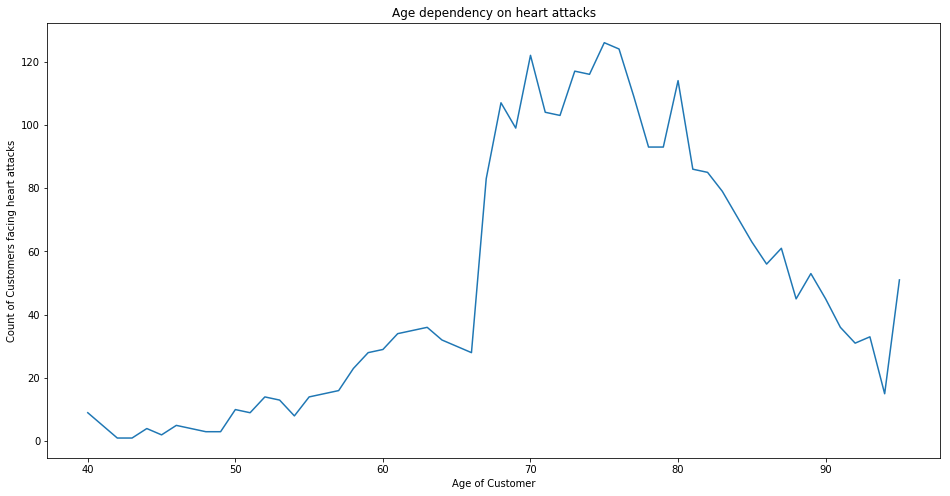

In [33]:
#Age Vs Heart attacks relationships
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(16,8))
plt.xlabel("Age of Customer")
plt.ylabel("Count of Customers facing heart attacks")
plt.title("Age dependency on heart attacks")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

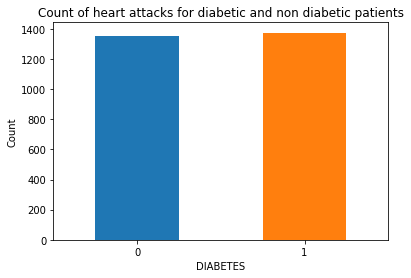

In [34]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

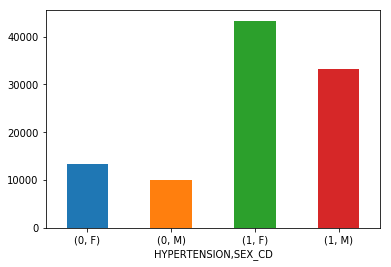

In [35]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

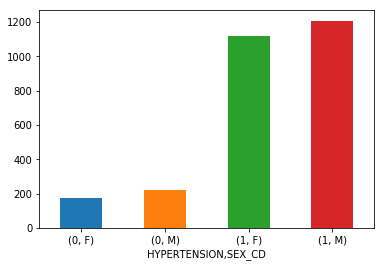

In [36]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

In [37]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.00000,0.52947
RECON_RX_RISK_SCORE_NBR,0.52947,1.00000


In [38]:
df[['CON_VISIT_01_Q01','CON_VISIT_01_Q02','CON_VISIT_01_Q03','CON_VISIT_01_Q04']].corr()

,CON_VISIT_01_Q01,CON_VISIT_01_Q02,CON_VISIT_01_Q03,CON_VISIT_01_Q04
CON_VISIT_01_Q01,1.000000,0.249303,0.126962,0.113894
CON_VISIT_01_Q02,0.249303,1.000000,0.320167,0.143733
CON_VISIT_01_Q03,0.126962,0.320167,1.000000,0.264533
CON_VISIT_01_Q04,0.113894,0.143733,0.264533,1.000000


In [39]:
df.columns

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT',
       ...
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG'],
      dtype='object', length=448)

In [40]:
df['AMI_FLAG'].fillna(0,inplace=True)

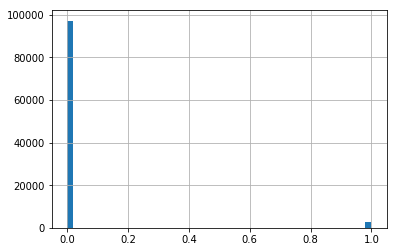

In [41]:
df['AMI_FLAG'].hist(bins=50)

In [42]:
#Replacing nan values with mean,median,mode
df['SEX_CD'].fillna('F',inplace=True)

df['ESRD_IND'].fillna('N',inplace=True)

df['HOSPICE_IND'].fillna('N',inplace=True)

df['ORIG_REAS_ENTITLE_CD'].fillna(0,inplace=True)

df['PCP_ASSIGNMENT'].fillna('MEMBER SELECTED',inplace=True)

df['DUAL'].fillna('N',inplace=True)

df['INSTITUTIONAL'].fillna('N',inplace=True)

df['LIS'].fillna('N',inplace=True)

df['MCO_HLVL_PLAN_CD'].fillna('MAPD',inplace=True)

df['MCO_PROD_TYPE_CD'].fillna('HMO',inplace=True)

df['Diab_Type'].fillna('Diabetes Type II',inplace=True)

df['Dwelling_Type'].fillna('S',inplace=True)

df['Education_level'].fillna(np.nanmedian(df['Education_level']),inplace=True)

#df['Length_residence'].describe()

df['Length_residence'].fillna(np.nanmedian(df['Length_residence']),inplace=True)

df['Est_BMI_decile'].fillna(np.nanmean(df['Est_BMI_decile']),inplace=True)

df['Num_person_household'].fillna(np.nanmedian(df['Num_person_household']),inplace=True)

df['College'].fillna(0,inplace=True)

df['Online_purchaser'].fillna(0,inplace=True)

df['Online_User'].fillna(1,inplace=True)

df['Pct_above_poverty_line'].fillna(np.nanmedian(df['Pct_above_poverty_line']),inplace=True)

df['Pct_below_poverty_line'].fillna(np.nanmedian(df['Pct_below_poverty_line']),inplace=True)

df['Decile_struggle_Med_lang'].fillna(round(np.nanmean(df['Decile_struggle_Med_lang'])),inplace=True)

df['Home_value'].fillna(round(np.nanmedian(df['Home_value'])),inplace=True)

df['Est_Net_worth'].fillna(np.nanmedian(df['Est_Net_worth']),inplace=True)

#df['Est_income'].describe()

df['Est_income'].fillna(55000,inplace=True)

df['Index_Health_ins_engage'].fillna(np.nanmedian(df['Index_Health_ins_engage']),inplace=True)

df['Index_Health_ins_influence'].fillna(np.nanmedian(df['Index_Health_ins_influence']),inplace=True)

df['Population_density_centile_ST'].fillna(round(np.nanmean(df['Population_density_centile_ST'])),inplace=True)

df['Population_density_centile_US'].fillna(np.nanmedian(df['Population_density_centile_US']),inplace=True)

In [43]:
l=df.columns[df.isna().any()].tolist()

In [45]:
#df.select_dtypes(include='object').columns

In [46]:
#df=pd.get_dummies(df)

In [47]:
df.shape

(100000, 448)

In [48]:
#Tranforming continuous columns "CON_VISIT_0XXXX" into categorical levels
for i in range(1,34):
    try:    
        if i<10:
            s='CON_VISIT_0' + str(i)+'_Q0'
            for j in range(1,5):
                col=s+str(j)
                #print(col)
                df.loc[df[col]>1,col]=2
                df[col]=df[col].astype('object')
        else:
            s='CON_VISIT_' + str(i)+'_Q0'
            for j in range(1,5):
                col=s+str(j)
                #print(col)
                df.loc[df[col]>1,col]=2
                df[col]=df[col].astype('object')
    except:
        continue


In [54]:
df[df['AMI_FLAG']==1].groupby('POT_VISIT_11_Q01').count()['']

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
POT_VISIT_11_Q01,,,,,,,,,,,,,,,,,,,,,
0,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,699,699,699,699,699,699
1,531,531,531,531,531,531,531,531,531,531,...,531,531,531,531,531,531,531,531,531,531
2,426,426,426,426,426,426,426,426,426,426,...,426,426,426,426,426,426,426,426,426,426
3,299,299,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,299,299,299
4,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
5,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
6,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
7,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
8,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


In [62]:
#Dropping columns "POT_VISIT_0XXXX" into categorical levels
filter_col = [col for col in df if col.startswith('POT_VISIT')]
df[filter_col].astype('object')
filter_col
delcol=[]
l=[11,12,13,15,19,20,21,22,23,24,31,32,33,41,50,51,53,61,65,71,72,81,99]
for col in filter_col:
    templist=col.split('_')
    if int(templist[2]) in l:
        continue
    else:
        delcol.append(col)
df.drop(axis=1,columns=delcol,inplace=True)

In [61]:
#pd.get_dummies(df,columns=df.select_dtypes(include='object').columns)
#df.dtypes

In [63]:
df=pd.get_dummies(df)

In [64]:
t=list(df.columns)
tmp=df.columns[df.columns.get_loc('AMI_FLAG')]

t.append(tmp)


del t[df.columns.get_loc('AMI_FLAG')]

df=df[t]

In [65]:
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]

In [66]:
X.shape

(100000, 658)

In [67]:
y.shape

(100000,)

In [68]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=25)

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[19462,     0],
       [  538,     0]], dtype=int64)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
predictions=lr.predict(X_test)

In [73]:
confusion_matrix(y_test,predictions)

array([[19458,     4],
       [  538,     0]], dtype=int64)

In [74]:
y_test.value_counts()

0    19462
1      538
Name: AMI_FLAG, dtype: int64

In [75]:
from sklearn import tree

In [76]:
clf_tree=tree.DecisionTreeClassifier(random_state=42)

In [77]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [78]:
predictions=clf_tree.predict(X_test)

In [79]:
confusion_matrix(y_test,predictions)

array([[18828,   634],
       [  491,    47]], dtype=int64)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gb=GradientBoostingClassifier()

In [82]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
predictions=gb.predict(X_test)

In [84]:
confusion_matrix(y_test,predictions)

array([[19440,    22],
       [  537,     1]], dtype=int64)

In [85]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.00000,0.52947
RECON_RX_RISK_SCORE_NBR,0.52947,1.00000


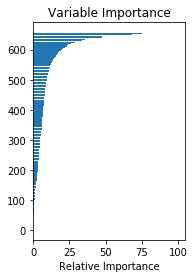

In [86]:
feature_importance=rf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [87]:
#X.iloc[:,sorted_idx[0:200]].columns

In [88]:
#X=X.iloc[:,sorted_idx[0:300]]

In [91]:
sns.set(color_codes=True)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


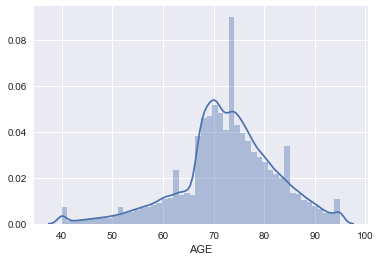

In [92]:
sns.distplot(X['AGE'])

In [93]:
X['RECON_MA_RISK_SCORE_NBR']=X['RECON_MA_RISK_SCORE_NBR']+np.mean(X['RECON_MA_RISK_SCORE_NBR'])

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


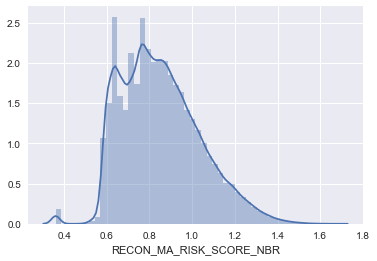

In [94]:
sns.distplot(np.sqrt(np.log(X['RECON_MA_RISK_SCORE_NBR'])))

In [95]:
X.columns

Index(['AGE', 'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'POT_VISIT_11_Q01', 'POT_VISIT_11_Q02',
       'POT_VISIT_11_Q03', 'POT_VISIT_11_Q04', 'POT_VISIT_81_Q01',
       'POT_VISIT_21_Q02',
       ...
       'Diab_Type_Diabetes Type II', 'Diab_Type_Diabetes Unspeci',
       'Dwelling_Type_A', 'Dwelling_Type_B', 'Dwelling_Type_C',
       'Dwelling_Type_M', 'Dwelling_Type_N', 'Dwelling_Type_P',
       'Dwelling_Type_S', 'Dwelling_Type_T'],
      dtype='object', length=658)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


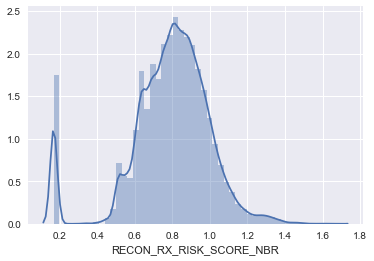

In [96]:
sns.distplot(np.sqrt(np.log(X['RECON_RX_RISK_SCORE_NBR']+np.mean(X['RECON_RX_RISK_SCORE_NBR']))))

In [97]:
# Drop CON_VISIT_01_Q01

In [98]:
df['POT_VISIT_99_Q04'].value_counts()# delete 'POT_VISIT_02_QXX','POT_VISIT_03_QXX','POT_VISIT_04_QXX'
#retain 11,12,13,15,19,20,21,22,23,24,31,32,33,41,50,51,53,61,65,71,72,81,99

0     99797
1       143
3        23
2        23
4         5
5         3
18        1
12        1
73        1
8         1
7         1
6         1
Name: POT_VISIT_99_Q04, dtype: int64

In [99]:
df.shape

(100000, 660)

In [100]:
#X=df.iloc[:,1:len(df.columns)-1]
#y=df.iloc[:,-1]

In [101]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf_tree=tree.DecisionTreeClassifier()

clf_tree.fit(X_train,y_train)

predictions=clf_tree.predict(X_test)

confusion_matrix(y_test,predictions)
precision_score(y_test,predictions)
recall_score(y_test,predictions)

array([[18820,   642],
       [  487,    51]], dtype=int64)

In [102]:
lr=LogisticRegression()

In [103]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
predictions=lr.predict(X_test)

In [105]:
confusion_matrix(y_test,predictions)
precision_score(y_test,predictions)
recall_score(y_test,predictions)

array([[19458,     4],
       [  538,     0]], dtype=int64)

In [106]:
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)

In [111]:
confusion_matrix(y_test,predictions)
precision_score(y_test,predictions)
recall_score(y_test,predictions)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [112]:
#y_normalize=preprocessing.normalize(y)

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions=gnb.predict(X_test)

In [115]:
confusion_matrix(y_test,predictions)

array([[  744, 18718],
       [   19,   519]], dtype=int64)

In [116]:
precision_score(y_test,predictions)

0.026979258720174662

In [117]:
recall_score(y_test,predictions)

0.9646840148698885

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [119]:
predictions=lda.predict(X_test)

In [120]:
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

[[19312   150]
 [  508    30]]
0.16666666666666666
0.055762081784386616
